In [ ]:
import pandas as pd
import numpy as np
import json 
import matplotlib.pyplot as plt
from os import environ

filename = environ['input_data_fp']
fig_no = int(environ['input_fig_number'])
if fig_no == 1:
    fig_size = 10
else:
    fig_size = 20

pd.options.display.float_format = '{:10,.2f}'.format
pd.set_option('display.width', 999)

key_index = ['actual_paint_frames',
            'expected_frames', 
            'frame_throughput',
            'long_frame',
            'il_run_time',
            'ft_run_time']

with open(filename) as data_file:
    data = json.load(data_file)
    fps = data["video-recording-fps"]
    remove_data = ["video-recording-fps"]
    for item in remove_data:
        del data[item]
    d = pd.DataFrame(data)
    
    df = pd.concat([pd.DataFrame(d[column]['time_list']).T for column in d], axis=1)

    dft = df.loc[key_index, :]

dft

,test_chrome_facebook_ft_type_composerbox_100_txt,test_firefox_facebook_ft_type_composerbox_100_txt
actual_paint_frames,1914,3069
expected_frames,9131,9127
frame_throughput,0.21,0.34
long_frame,511.11,500.00


In [ ]:
# Retrive 'il_run_time' from each run
il_runtime = pd.DataFrame([pd.DataFrame(d[c]['time_list'])['il_run_time'] for c in d]).T
il_runtime.columns = d.columns
il_runtime

In [ ]:
il_runtime.quantile([0.01, 0.05, 0.95, 0.99], interpolation='nearest')

In [ ]:
il_runtime.describe()

In [ ]:
# Retrive 'ft_run_time' from each run
ft_runtime = pd.DataFrame([pd.DataFrame(d[c]['time_list'])['ft_run_time'] for c in d]).T
ft_runtime.columns = d.columns
ft_runtime

In [ ]:
ft_runtime.quantile([0.01, 0.05, 0.95, 0.99], interpolation='nearest')

In [ ]:
ft_runtime.describe()

In [ ]:
il_runtime.plot.hist(bins=20,
                  histtype='bar',
                  subplots=True, layout=(2,fig_no),
                  figsize=(fig_size,10))
il_runtime.plot.box(subplots=True,
                 layout=(1, fig_no),
                 sharey=True, sharex=True, figsize=(fig_size, 10))
plt.show()

In [ ]:
ft_runtime.plot.hist(bins=20,
                  histtype='bar',
                  subplots=True, layout=(2,fig_no),
                  figsize=(fig_size,10))
ft_runtime.plot.box(subplots=True,
                 layout=(1, fig_no),
                 sharey=True, sharex=True, figsize=(fig_size, 10))
plt.show()

In [30]:
frame = pd.DataFrame([pd.Series(df[c]['time_seq']).diff()
                                                  .apply(lambda x: np.round(x/(1000/fps)))
                                                  .drop(0)
                                                  .astype(int) for c in df]).T
frame.columns = df.columns
frame

,test_chrome_facebook_ft_type_composerbox_100_txt,test_firefox_facebook_ft_type_composerbox_100_txt
1,1.00,1.00
2,1.00,2.00
3,1.00,1.00
4,1.00,1.00
5,1.00,3.00
6,1.00,1.00
7,1.00,3.00
8,41.00,1.00
9,1.00,3.00
10,1.00,1.00


In [25]:
frame.quantile([0.01, 0.05, 0.95, 0.99], interpolation='nearest')

,test_chrome_facebook_ft_type_composerbox_100_txt,test_firefox_facebook_ft_type_composerbox_100_txt
0.01,1.00,1.00
0.05,1.00,1.00
0.95,41.00,7.00
0.99,45.00,34.00


In [26]:
frame.describe()

,test_chrome_facebook_ft_type_composerbox_100_txt,test_firefox_facebook_ft_type_composerbox_100_txt
count,"1,913.00","3,068.00"
mean,4.77,2.97
std,11.09,4.84
min,1.00,1.00
25%,1.00,1.00
50%,1.00,1.00
75%,1.00,4.00
max,46.00,45.00


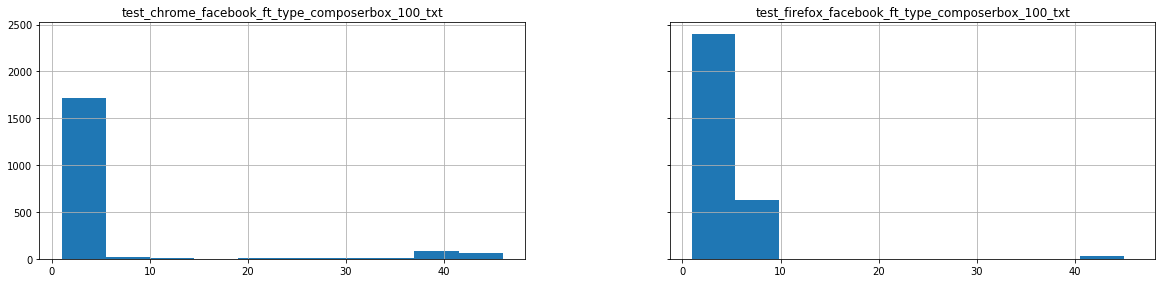

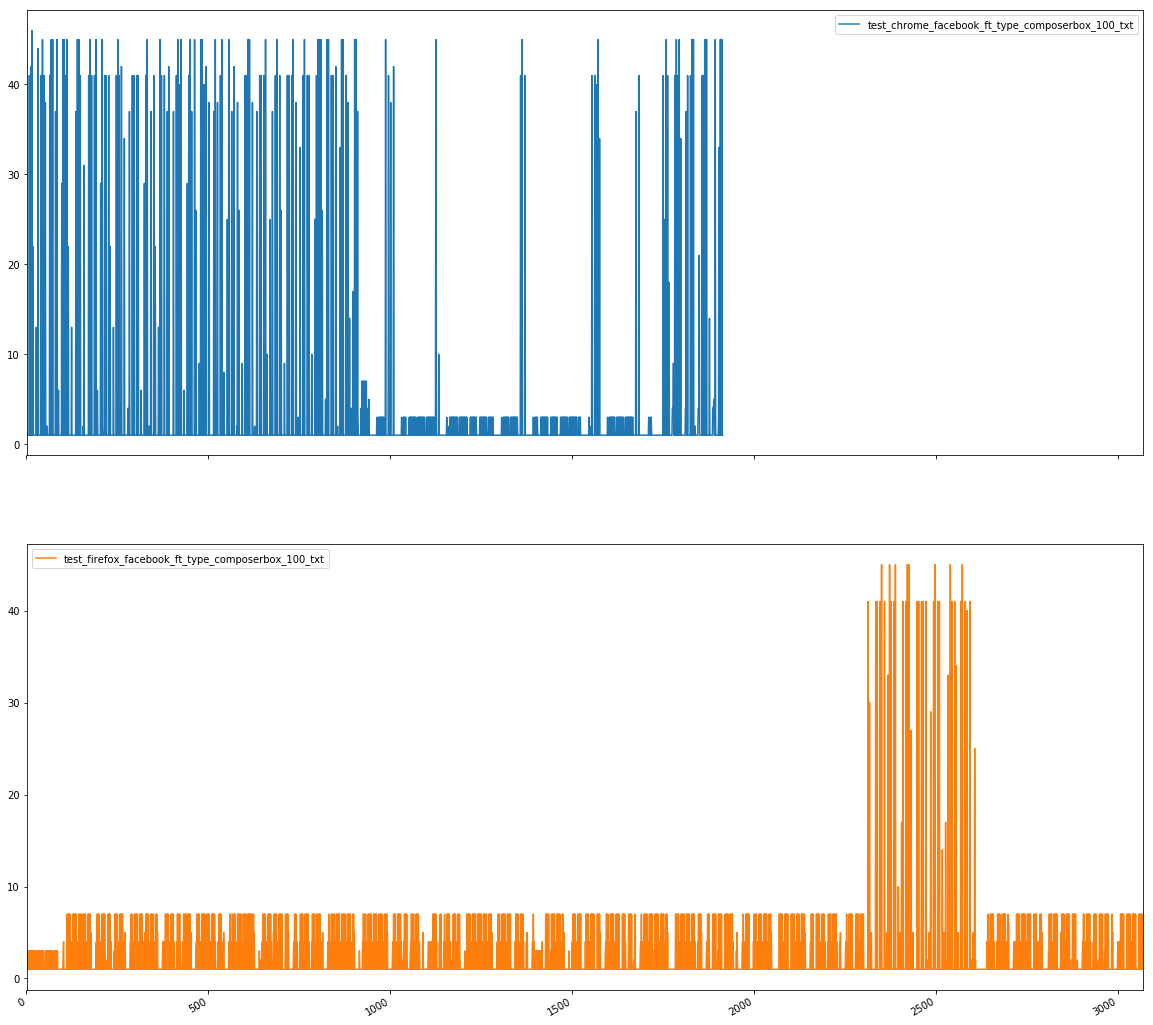

In [28]:
frame.hist( layout=(2,fig_no), sharey=True, sharex=True, figsize=(fig_size,10))
frame.plot(subplots=True, layout=(fig_no,1), figsize=(20,20), ylim=(0,20))
plt.show()